# Notebook Hands-on 4: Logistic Regression Notebook (Tutorial) Ramiro Amador  Guerra

## 1.1 Fundamentos de la Técnica

La **Regresión Logística** es un método de aprendizaje supervisado usado para problemas de **clasificación binaria**.
Modela la probabilidad de pertenencia a una clase usando la función sigmoide, que transforma la salida del modelo a valores entre 0 y 1.

Es eficiente, interpretable y funciona bien cuando los datos son linealmente separables.


## 1.2 Modelo Matemático

El modelo calcula:

$$
h_\theta(x) = \sigma(\theta^T x)
$$

donde la función sigmoide es:

$$
\sigma(z)=\frac{1}{1 + e^{-z}}
$$

La decisión se toma según:

$$
\hat{y} =
\begin{cases}
1 & \text{si } h_\theta(x) \ge 0.5 \\
0 & \text{si } h_\theta(x) < 0.5
\end{cases}
$$

La función de costo es la pérdida logística (log-loss):

$$
J(\theta)= -\frac{1}{m}\sum_{i=1}^{m} \left[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))\right]
$$

## 1.3 Librería, clases y funciones

Usaremos la librería **scikit-learn** y la clase:

`sklearn.linear_model.LogisticRegression`

Funciones clave:
- `.fit()` → entrena
- `.predict()` → predice clases
- `.predict_proba()` → probabilidades
- `.score()` → accuracy


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Clasificación binaria: eliminar clase 2
X = X[y != 2]
y = y[y != 2]

# Convertir a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


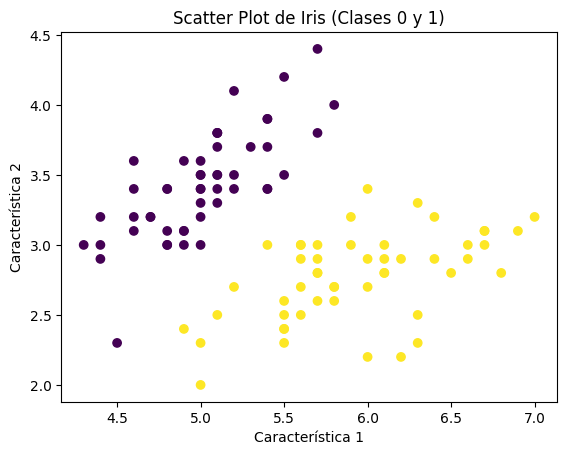

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Scatter Plot de Iris (Clases 0 y 1)")
plt.show()

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
def clasificar_patron(patron):
    patron = np.array(patron).reshape(1, -1)
    patron = scaler.transform(patron)
    pred = model.predict(patron)[0]
    proba = model.predict_proba(patron)[0][pred]
    return f"Clase predicha: {pred}, Probabilidad: {proba:.4f}"

# Ejemplo
clasificar_patron([5.1, 3.5, 1.4, 0.2])

'Clase predicha: 0, Probabilidad: 0.9838'

In [6]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0],
       [ 0, 11]])

In [7]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


### Resultados

- **Matriz de Confusión:** muestra aciertos y errores.
- **Accuracy:** mide la proporción de predicciones correctas.
Valores cercanos a 1 indican excelente desempeño.

### References

LogisticRegression. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Wikipedia contributors. (2025, November 19). Logistic regression. Wikipedia. https://en.wikipedia.org/wiki/Logistic_regression